In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

In [3]:
path=r'C:\Users\shreya\Downloads\archive (1)\chest_xray\chest_xray'

In [4]:
normal_cases_dir = Path('C:\\Users\\shreya\\Downloads\\archive (1)\\chest_xray\\chest_xray\\train\\NORMAL')
Tuberculosis_cases_dir = Path('C:\\Users\\shreya\\Downloads\\archive (1)\\chest_xray\\chest_xray\\train\\PNEUMONIA')


In [5]:
normal_cases = normal_cases_dir.glob('*.jpeg')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.jpeg')

In [6]:
# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

In [7]:
# Go through all the pneumonia cases. The label for these cases will be 1
for img in Tuberculosis_cases:
    train_data.append((img, 1))

In [8]:
# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,C:\Users\shreya\Downloads\archive (1)\chest_xr...,1
1,C:\Users\shreya\Downloads\archive (1)\chest_xr...,1
2,C:\Users\shreya\Downloads\archive (1)\chest_xr...,1
3,C:\Users\shreya\Downloads\archive (1)\chest_xr...,1
4,C:\Users\shreya\Downloads\archive (1)\chest_xr...,0


In [9]:
train_data.shape

(5216, 2)

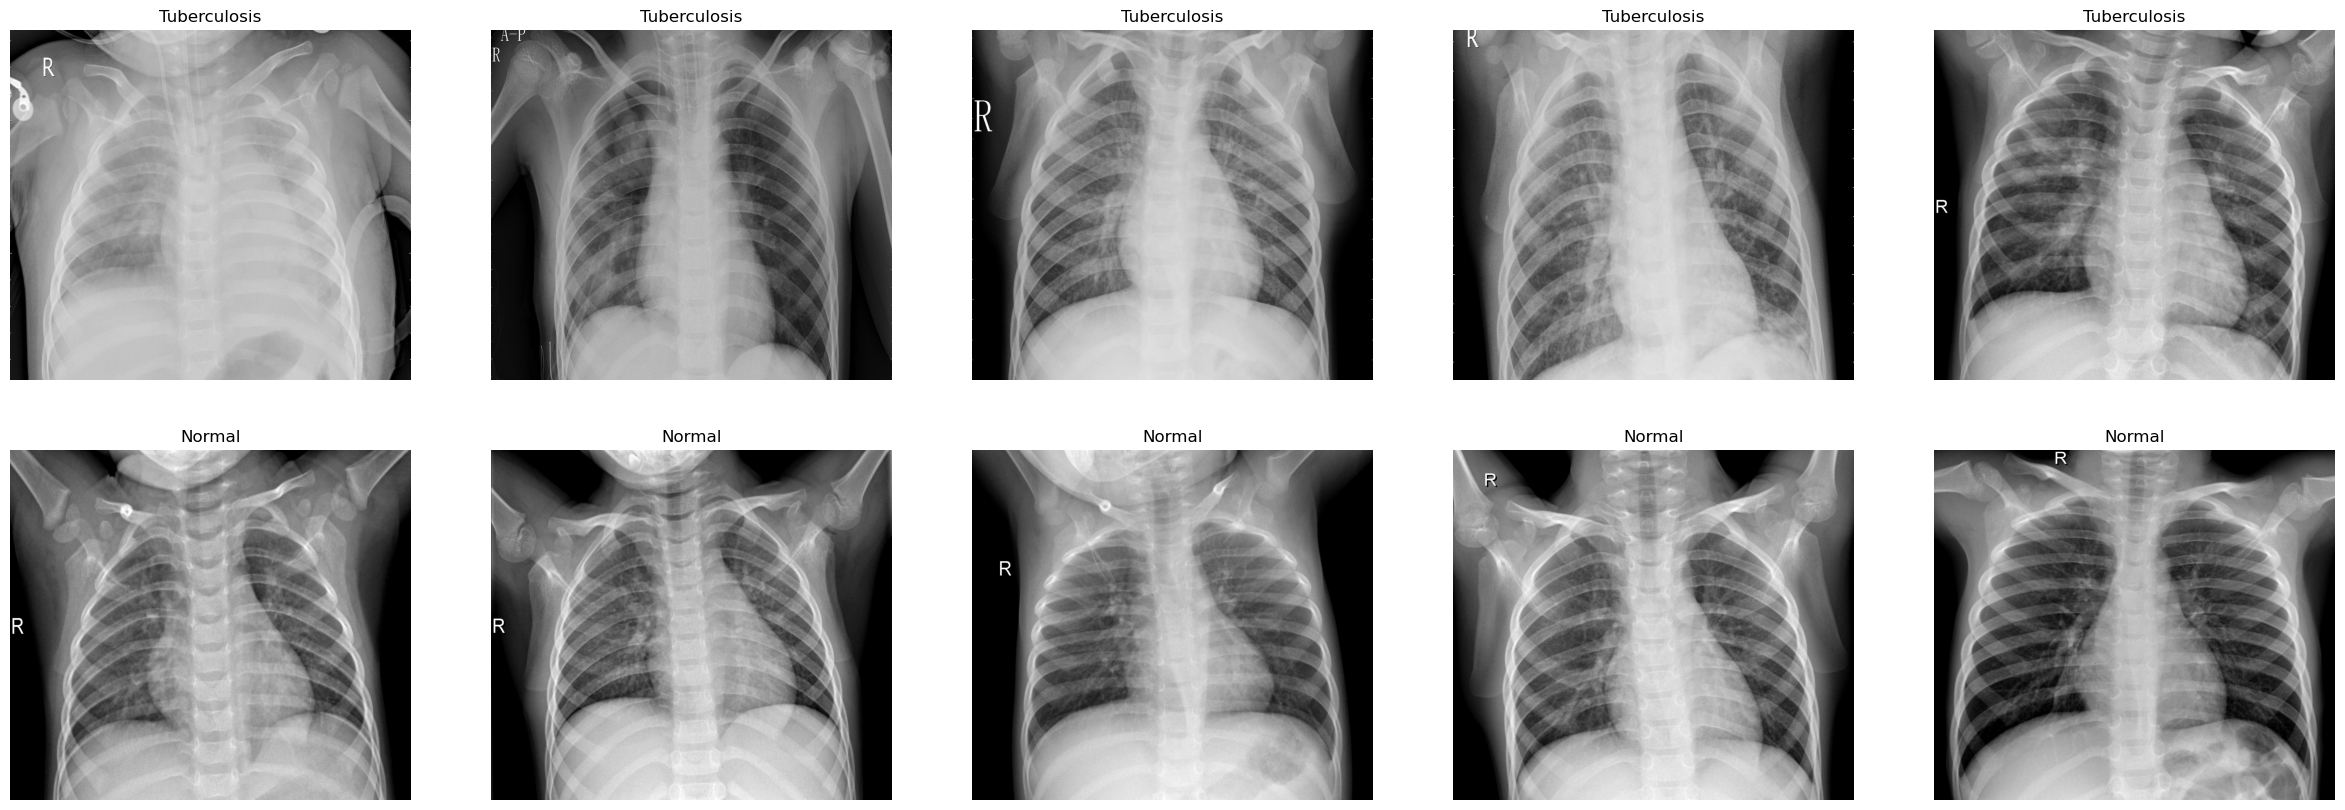

In [10]:
 #Get few samples for both the classes
Tuberculosis_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = Tuberculosis_samples + normal_samples
del Tuberculosis_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Tuberculosis")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [11]:
from tqdm import tqdm
train_normal = path
train_Tuberculosis = path

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
Tuberculosis_cases =Tuberculosis_cases_dir.glob('*.jpeg')
train_data = []
train_labels = []
from keras.utils.np_utils import to_categorical

for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)

    # Tuberculosis cases        
for img in tqdm(Tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tuberculosis'
    train_data.append(img)
    train_labels.append(label)

    # Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

1341it [01:44, 12.81it/s]
3875it [02:32, 25.45it/s]


Total number of validation examples:  (5216, 28, 28, 3)
Total number of labels: (5216,)


In [12]:
train_data1[1]

array([[[0.1254902 , 0.1254902 , 0.1254902 ],
        [0.22352941, 0.22352941, 0.22352941],
        [0.4       , 0.4       , 0.4       ],
        ...,
        [0.34509804, 0.34509804, 0.34509804],
        [0.34117647, 0.34117647, 0.34117647],
        [0.10980392, 0.10980392, 0.10980392]],

       [[0.11764706, 0.11764706, 0.11764706],
        [0.24705882, 0.24705882, 0.24705882],
        [0.40784314, 0.40784314, 0.40784314],
        ...,
        [0.36470588, 0.36470588, 0.36470588],
        [0.17647059, 0.17647059, 0.17647059],
        [0.09803922, 0.09803922, 0.09803922]],

       [[0.12156863, 0.12156863, 0.12156863],
        [0.18431373, 0.18431373, 0.18431373],
        [0.30588235, 0.30588235, 0.30588235],
        ...,
        [0.41960784, 0.41960784, 0.41960784],
        [0.17647059, 0.17647059, 0.17647059],
        [0.10196078, 0.10196078, 0.10196078]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.21568627, 0

In [13]:
train_labels1.shape

(5216,)

In [14]:
train_data1.shape


(5216, 28, 28, 3)

In [15]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,normal
1,normal
2,normal
3,normal
4,normal


In [16]:
train_labels1['label']=train_labels1['label'].map({'normal':0,'Tuberculosis':1})
train_labels1['label'].unique()
     

array([0, 1], dtype=int64)

In [17]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    3875
1    3875
Name: label, dtype: int64


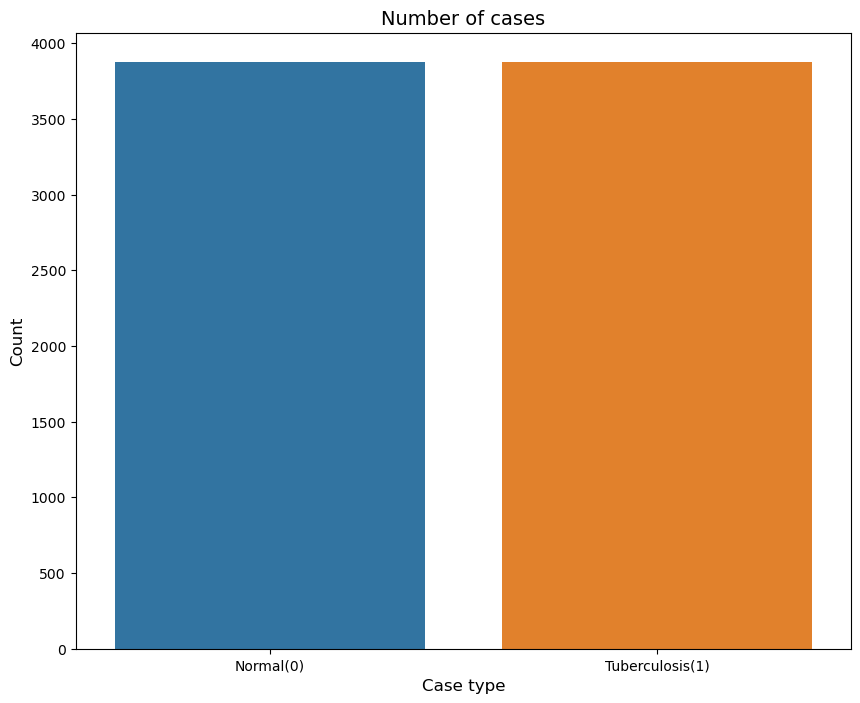

In [18]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count1.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

In [19]:
train_data2.shape

(7750, 2352)

In [20]:
train_labels2.shape


(7750, 1)

In [21]:
train_labels2
     

train_data2 =train_data2.reshape(-1,28,28,3)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.13, random_state=42)
     

In [23]:
X_train.shape
     

(6742, 28, 28, 3)

In [24]:
y_test.shape

(1008, 1)

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

In [26]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(564, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(np.array(X_train), np.array(y_train), epochs=20, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/20
211/211 [==============================] - 24s 62ms/step - loss: 0.6637 - accuracy: 0.5534 - val_loss: 0.3298 - val_accuracy: 0.8750
Epoch 2/20
211/211 [==============================] - 13s 62ms/step - loss: 0.3083 - accuracy: 0.8721 - val_loss: 0.2607 - val_accuracy: 0.9008
Epoch 3/20
211/211 [==============================] - 13s 61ms/step - loss: 0.2305 - accuracy: 0.9071 - val_loss: 0.1518 - val_accuracy: 0.9435
Epoch 4/20
211/211 [==============================] - 15s 70ms/step - loss: 0.1938 - accuracy: 0.9221 - val_loss: 0.1571 - val_accuracy: 0.9405
Epoch 5/20
211/211 [==============================] - 13s 62ms/step - loss: 0.1725 - accuracy: 0.9331 - val_loss: 0.1782 - val_accuracy: 0.9325
Epoch 6/20
211/211 [==============================] - 13s 64ms/step - loss: 0.1590 - accuracy: 0.9402 - val_loss: 0.1211 - val_accuracy: 0.9593
Epoch 7/20
211/211 [==============================] - 10s 49ms/step - loss: 0.1444 - accuracy: 0.9473 - val_loss: 0.1368 - val_accuracy:

In [29]:
print(np.average(history.history['accuracy']))

0.9239320665597915


In [30]:
print(np.average(history.history['loss']))

0.17287332713603973


In [31]:
test_data = []
image='../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-101.png'
img = cv2.imread(str(image))  


img=np.array(img)

test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [32]:
model.save('my_model1')

INFO:tensorflow:Assets written to: my_model1\assets


INFO:tensorflow:Assets written to: my_model1\assets


In [33]:
new_model = tf.keras.models.load_model('./my_model1')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [34]:
test_data = []
image='C:\\Users\\shreya\\Downloads\\archive (1)\\chest_xray\\chest_xray\\train\\NORMAL\\NORMAL2-IM-1362-0001.jpeg'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [35]:
a=model.predict(np.array(test_data1))

1/1 [==============================] - 1s 1s/step


In [36]:
np.argmax(a)

1

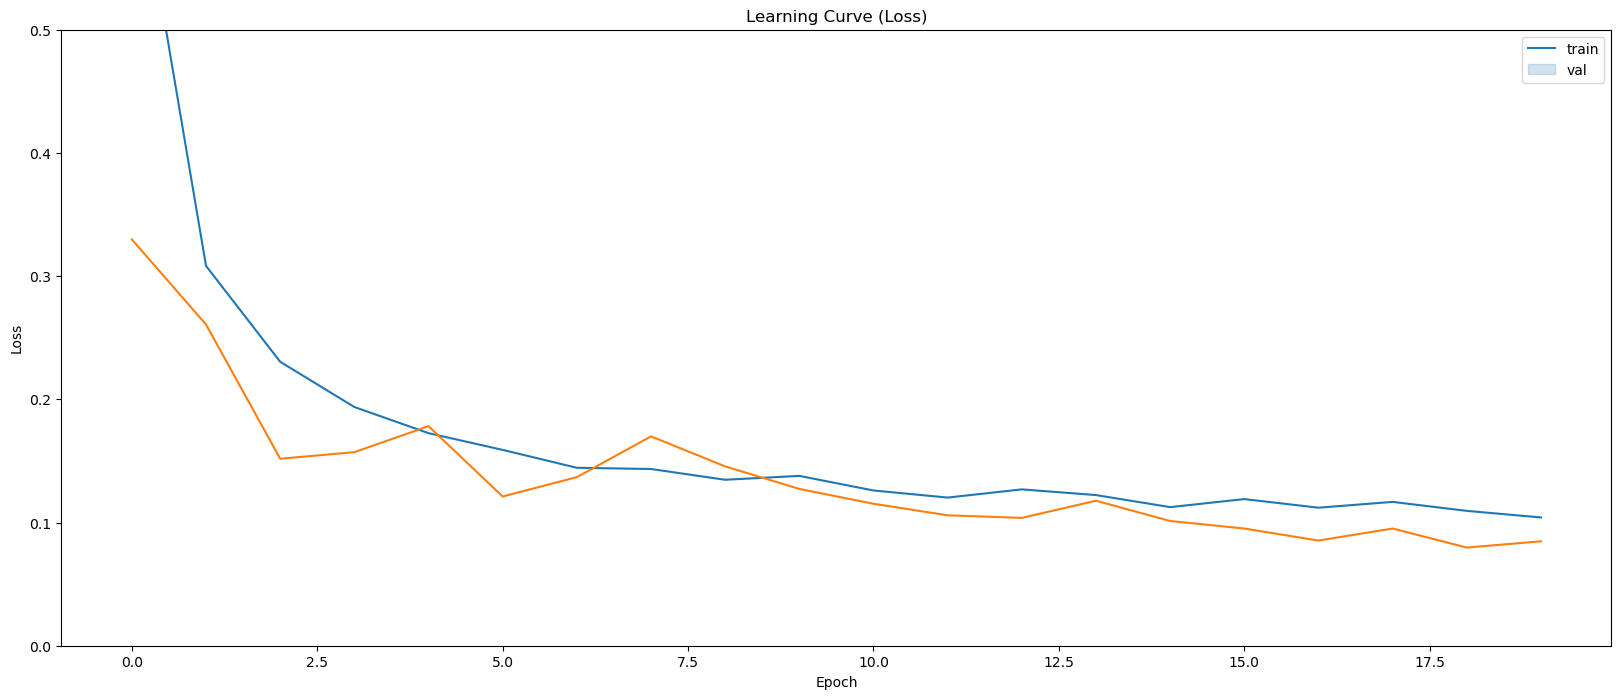

In [38]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

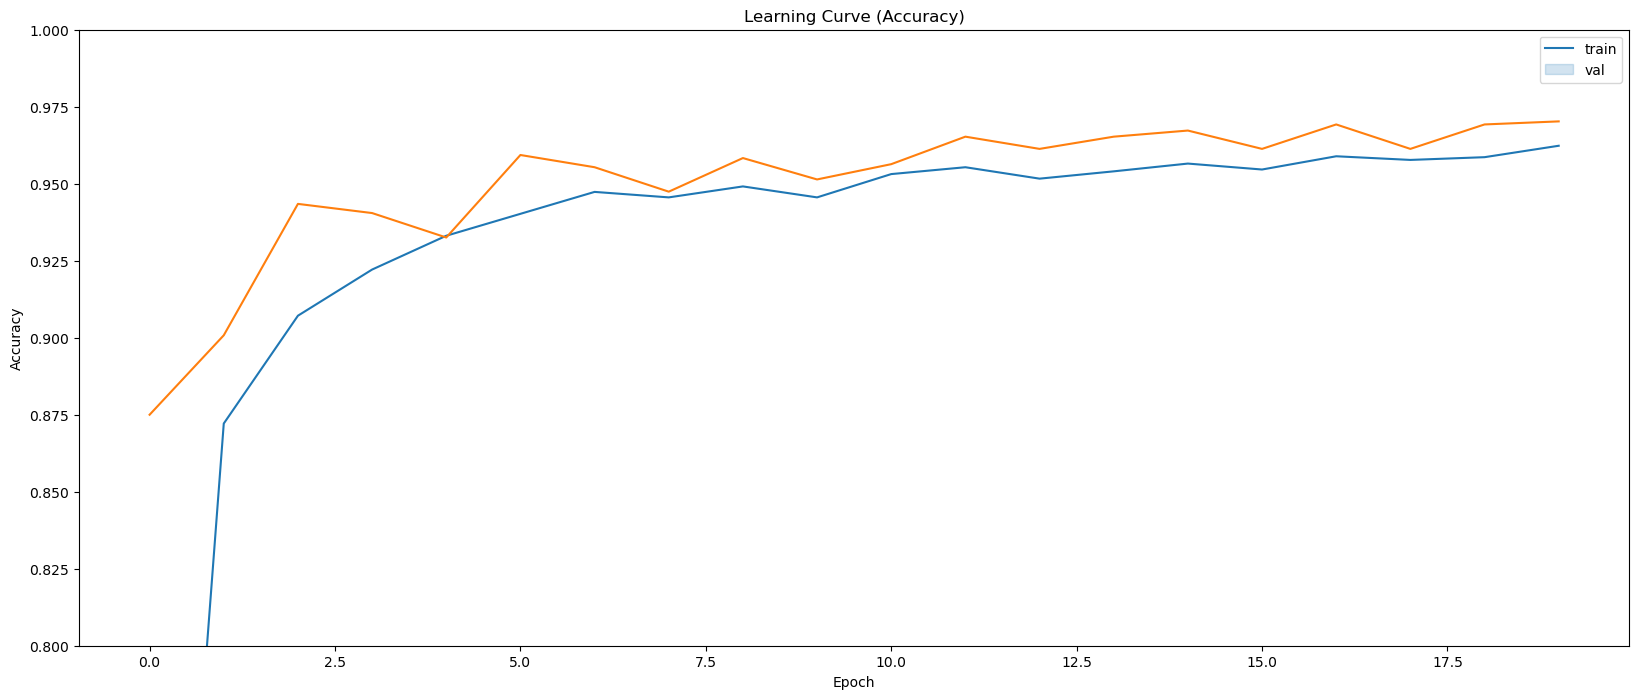

In [39]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [40]:
model=tf.keras.models.save_model(model,'my_model.hdf5')

In [41]:
import os
model = tf.keras.models.load_model('/content/my_model.hdf5')

OSError: No file or directory found at /content/my_model.hdf5

In [43]:
# Specify the path to the image file
image_path = 'C:\\Users\\shreya\\Downloads\\archive (1)\\chest_xray\\chest_xray\\train\\NORMAL\\NORMAL2-IM-1362-0001.jpeg'


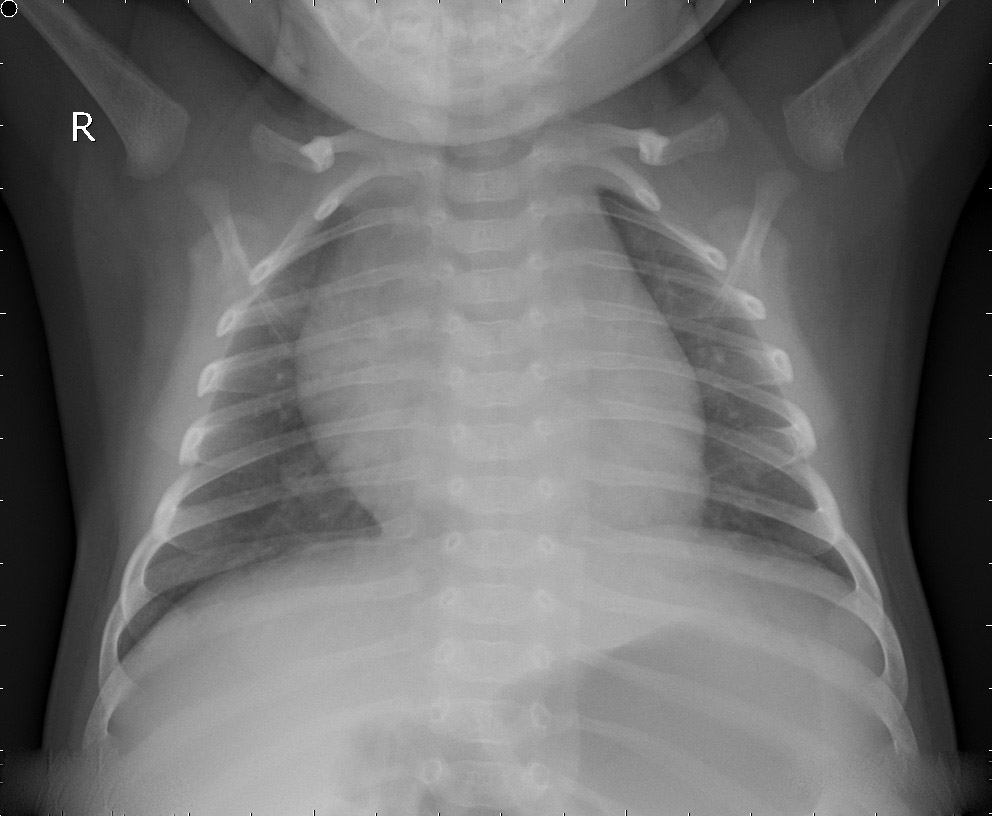

In [45]:
from IPython.display import Image

# Set the desired width and height (in pixels) for the displayed image
width = 300
height = 200

# Display the image with the specified size
Image(filename=image_path, width=width, height=height)

In [37]:
test_data = []
image='C:\\Users\\shreya\\Downloads\\archive (1)\\chest_xray\\chest_xray\\train\\NORMAL\\NORMAL2-IM-1362-0001.jpeg'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
test_data1 = np.array(test_data)   # Convert the list into numpy arrays
a=model.predict(np.array(test_data1))
np.argmax(a)
if (np.argmax(a) == 0):
  print('The person is normal')
else:
    print('The person has Tuberculosis')

1/1 [==============================] - 0s 24ms/step
The person has Tuberculosis
